# Question 1: Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
# ensure graphs appear in notebook
%matplotlib inline

# Question 2: Import Data, Data Cleaning

In [3]:
# Import Dataset
path = r'C:\Users\navya\Achievement 6'
df_births_kmeans = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_births_clean.csv'))

In [4]:
# Find number of rows and columns of dataframe
df_births_kmeans.shape

(5496, 12)

In [5]:
# Look at column names 
df_births_kmeans.columns

Index(['Unnamed: 0', 'State', 'State Abbreviation', 'State Code', 'Year',
       'Gender', 'Gender Code', 'Education Level of Mother',
       'Education Level Code', 'Number of Births per Category',
       'Average Age of Mother (years)', 'Average Birth Weight (g)'],
      dtype='object')

In [6]:
# Remove categorical variables from dataframe
df_births_kmeans = df_births_kmeans.drop(columns = ['Unnamed: 0', 'State', 'State Abbreviation',
                                                   'Gender', 'Education Level of Mother'])

In [7]:
# Check that only numerical data is in dataframe
df_births_kmeans.head()

State Code  Year  Gender Code  Education Level Code  \
0           1  2018            2                     0   
1           1  2019            2                     0   
2           1  2020            2                     0   
3           1  2017            2                     0   
4           1  2021            2                     0   

   Number of Births per Category  Average Age of Mother (years)  \
0                             58                           29.7   
1                             67                           29.4   
2                             69                           28.0   
3                             71                           29.1   
4                             78                           29.5   

   Average Birth Weight (g)  
0                    3298.1  
1                    3358.9  
2                    3205.0  
3                    3082.5  
4                    3060.2

In [8]:
# Check data types of dataframe
df_births_kmeans.dtypes

State Code                         int64
Year                               int64
Gender Code                        int64
Education Level Code               int64
Number of Births per Category      int64
Average Age of Mother (years)    float64
Average Birth Weight (g)         float64
dtype: object

### Descriptive Statistics of Mother's Age and Average Birth Weight

In [9]:
# find minimum birth weight
x = df_births_kmeans['Average Birth Weight (g)'].min()

In [10]:
# find maximum birth weight
y = df_births_kmeans['Average Birth Weight (g)'].max()

In [11]:
# range of birth weights
range_weights = y - x
range_weights

1133.7999999999997

In [12]:
# find mean and standard devation of birth weight
e = df_births_kmeans['Average Birth Weight (g)'].mean()
f = df_births_kmeans['Average Birth Weight (g)'].std()
print (e, f)

3250.8876273653564 114.45609001738386


In [13]:
# find minimum mother's age
a = df_births_kmeans['Average Age of Mother (years)'].min()

In [14]:
# find maximum mother's age
b = df_births_kmeans['Average Age of Mother (years)'].max()

In [15]:
# range of ages
range_ages = b - a
range_ages

12.399999999999999

In [16]:
# find mean and standard devation of mother's age
c = df_births_kmeans['Average Age of Mother (years)'].mean()
d = df_births_kmeans['Average Age of Mother (years)'].std()
print (c, d)

29.552274381368267 2.7797346568609327


### Standardize birth weights and mother's ages

In [17]:
# use z-score formula to standardize birth weights
df_births_kmeans['Average Birth Weight (g)'] = (df_births_kmeans['Average Birth Weight (g)'] - df_births_kmeans['Average Birth Weight (g)'].mean() ) / df_births_kmeans['Average Birth Weight (g)'].std()

In [18]:
# use z-score formula to standardize mother's ages
df_births_kmeans['Average Age of Mother (years)'] = (df_births_kmeans['Average Age of Mother (years)'] - df_births_kmeans['Average Age of Mother (years)'].mean() ) / df_births_kmeans['Average Age of Mother (years)'].std()

In [19]:
# Check that birth weights and mother's ages were standardized as expected
df_births_kmeans.head()

State Code  Year  Gender Code  Education Level Code  \
0           1  2018            2                     0   
1           1  2019            2                     0   
2           1  2020            2                     0   
3           1  2017            2                     0   
4           1  2021            2                     0   

   Number of Births per Category  Average Age of Mother (years)  \
0                             58                       0.053144   
1                             67                      -0.054780   
2                             69                      -0.558425   
3                             71                      -0.162704   
4                             78                      -0.018806   

   Average Birth Weight (g)  
0                  0.412493  
1                  0.943701  
2                 -0.400919  
3                 -1.471198  
4                 -1.666033

# Elbow Technique

In [20]:
# Define the k-means clusters in the range of 1 to 10
num_clusters = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_clusters] 

In [21]:
# Create a score to represent rate of variation for the cluster
score = [kmeans[i].fit(df_births_kmeans).score(df_births_kmeans) for i in range(len(kmeans))]
score

C:\Users\navya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\navya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\navya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\navya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-245718212069.30243,
 -99994886562.45435,
 -37376407611.45265,
 -19555239906.550278,
 -13633519103.250898,
 -9824993052.316332,
 -6535372832.124934,
 -4976980632.721135,
 -4064246425.7218513]

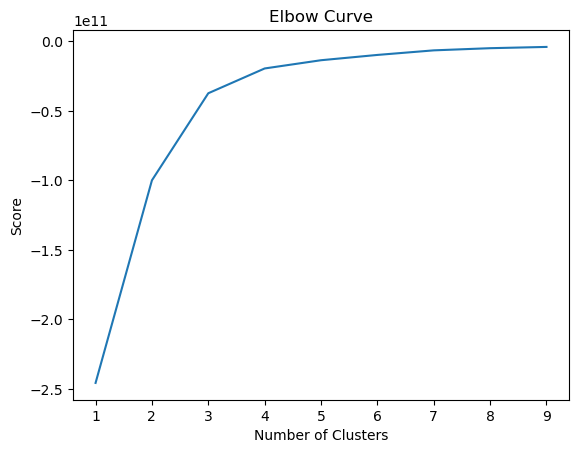

In [22]:
# Plot elbow curve
pl.plot(num_clusters, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Question 4: Number of Clusters

### The elbow curve starts flattening out around 4, after it jumped from 2 to 3 and 3 to 4. So, the number of clusters to use for the k-means algorithm is 4.

# Question 5: Run k-means Algorithm

In [23]:
# Create k-means object
kmeans = KMeans(n_clusters = 4)

In [24]:
# Fit the k-means object to the dataframe
kmeans.fit(df_births_kmeans)

C:\Users\navya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [25]:
# Apply k-means algorithm to dataframe
df_births_kmeans['clusters'] = kmeans.fit_predict(df_births_kmeans)

C:\Users\navya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Question 6: Clusters Column

In [26]:
# Check that clusters column was made
df_births_kmeans.head()

State Code  Year  Gender Code  Education Level Code  \
0           1  2018            2                     0   
1           1  2019            2                     0   
2           1  2020            2                     0   
3           1  2017            2                     0   
4           1  2021            2                     0   

   Number of Births per Category  Average Age of Mother (years)  \
0                             58                       0.053144   
1                             67                      -0.054780   
2                             69                      -0.558425   
3                             71                      -0.162704   
4                             78                      -0.018806   

   Average Birth Weight (g)  clusters  
0                  0.412493         0  
1                  0.943701         0  
2                 -0.400919         0  
3                 -1.471198         0  
4                 -1.666033         0

In [27]:
# Count the number of values in each cluster
df_births_kmeans['clusters'].value_counts()

clusters
0    3765
3    1192
1     454
2      85
Name: count, dtype: int64

# Question 7: Visualizations

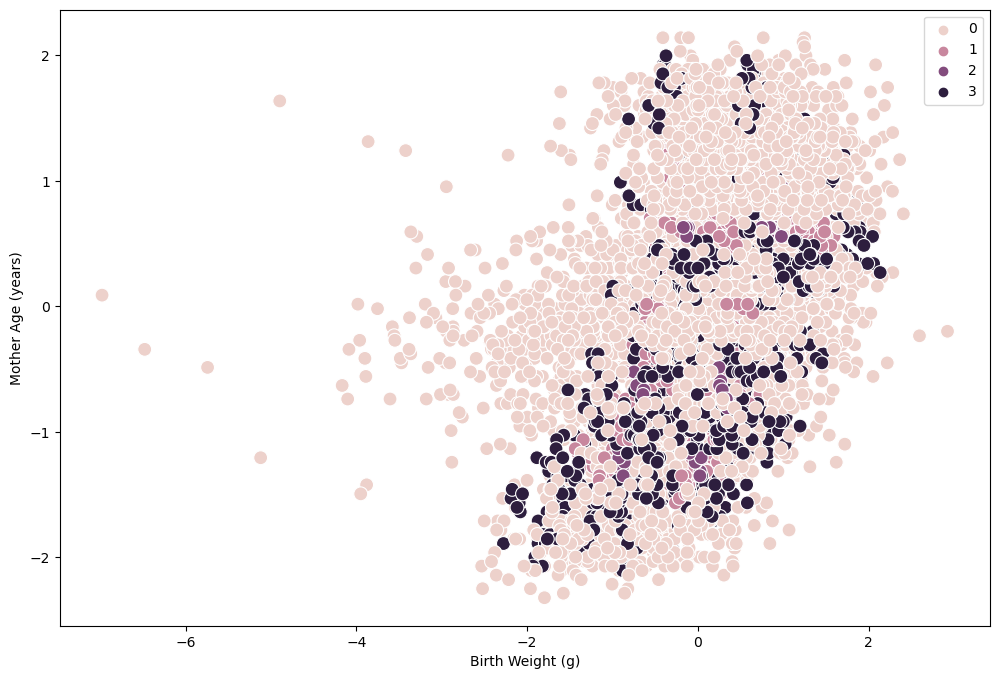

In [28]:
# Plot clusters for Mother's Age and Birth weight variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_births_kmeans['Average Birth Weight (g)'], y=df_births_kmeans['Average Age of Mother (years)'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Birth Weight (g)')
plt.ylabel('Mother Age (years)') 
plt.show()

#### There does not appear to be a linear relationship between mother's age and birth weight. The lowest birth weights are seen in the light pink cluster, which is also the cluster with the greatest number of values. There are not many dark purple dots, suggesting that younger mothers (between 0 and 2 standard deviations below the mean) are more rare in this dataset, and that younger mothers tend to have babies at birth weights within 2 standard deviations of the mean. The cluser with the least number of dots is the pink cluster, which is mothers closest to average age and average birth weight. It would likely be more expected for this cluster to be larger because it is centered around the average, but not having this results suggests that there is wide variability among birth weights and mother's ages.

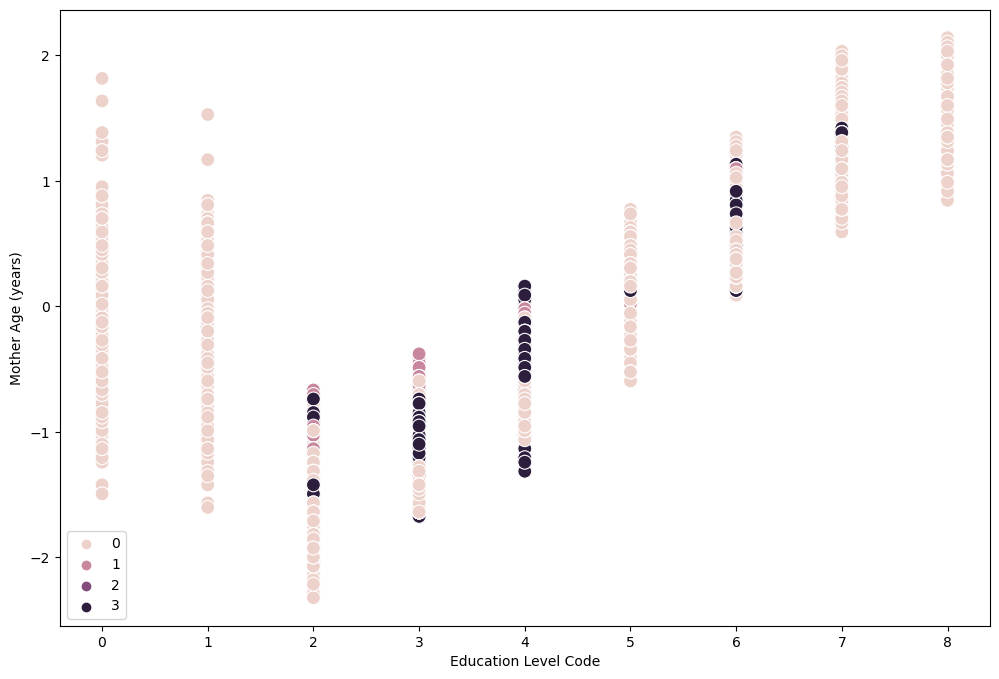

In [29]:
# Plot clusters for Mother's Age and Education Level Code variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_births_kmeans['Education Level Code'], y=df_births_kmeans['Average Age of Mother (years)'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Education Level Code')
plt.ylabel('Mother Age (years)') 
plt.show()

# Question 8: Discussion

#### From the plot of mother's age vs. birth weight, there does not appear to be a linear relationship between mother's age and birth weight. The lowest birth weights are seen in the light pink cluster, which is also the cluster with the greatest number of values. There are not many dark purple dots, suggesting that younger mothers (between 0 and 2 standard deviations below the mean) are more rare in this dataset, and that younger mothers tend to have babies at birth weights within 2 standard deviations of the mean. The cluser with the least number of dots is the pink cluster, which is mothers closest to average age and average birth weight. It would likely be more expected for this cluster to be larger because it is centered around the average, but not having this results suggests that there is wide variability among birth weights and mother's ages.

#### From the plot of mother's age vs. education level, there are mostly light pink dots closer to the x-axis, suggesting that most of the mothers in the light pink cluster were young in comparison to other mothers with the same education level. The dark purple clusters, regardless of education level, tend to be in the lower end of mother's ages (1 or 2 standard deviations below the mean).

#### Looking at the dark purple clusters in both plots suggests that younger mothers, regardless of education level, tend to have babies with lower birth weights. 

# Question 9: Calculate Descriptive Statistics for Clusters

In [30]:
# Categorize clusters
df_births_kmeans.loc[df_births_kmeans['clusters'] == 3, 'cluster'] = 'dark purple'
df_births_kmeans.loc[df_births_kmeans['clusters'] == 2, 'cluster'] = 'purple'
df_births_kmeans.loc[df_births_kmeans['clusters'] == 1, 'cluster'] = 'pink'
df_births_kmeans.loc[df_births_kmeans['clusters'] == 0, 'cluster'] = 'light pink'

In [31]:
# Calculate mean and median of variables of interest
df_births_kmeans.groupby('cluster').agg({'Average Birth Weight (g)':['mean', 'median'],
                         'Average Age of Mother (years)':['mean', 'median'],
                         'Education Level Code':['mean', 'median']})

Average Birth Weight (g)           Average Age of Mother (years)  \
                                mean    median                          mean   
cluster                                                                        
dark purple                 0.099263  0.123299                     -0.180873   
light pink                 -0.035158  0.029814                      0.084494   
pink                        0.024102  0.005350                     -0.168013   
purple                      0.036557 -0.031345                     -0.308719   

                      Education Level Code         
               median                 mean median  
cluster                                            
dark purple -0.198679             4.496644    4.0  
light pink   0.089118             3.818858    4.0  
pink        -0.378552             4.281938    4.0  
purple      -0.630375             4.117647    4.0

#### The youngest mothers are represented in the pink clusters. The oldest mothers are represented in the light pink clusters. It is interesting that the light pink clusters also have the lowest average education level code, but it is possible that the unknown values ("0") are skewing this mean. The average age of mothers in the dark purple and purple clusters is the most similar, yet the average birth weight for these two clusters is the furthest apart. 

# Question 10: Future Steps

#### It is useful to look at relationships between birth weight and mother's age because they can provide insights for prenatal studies. For example, for studying prematurely born babies, it would be helpful to track mother's age and see if there is a relationship there. More research on the connection between baby weight and baby health can also be done to add more variables to understanding and predict the relationship between quantitative variables related to birth. Another example would be connecting birth weight and mother's age to location of birth, which can be expanded to a global study with factors including access to prenatal care, cultural norms, and food availability. Then, this results from this study can potentially be used to predict risk factors to baby health. 